## Exercise 4

#### Name: Charles Kevin Bandala

#### Student Number: 202220041

In [2]:
# Libraries

library(fpp2)
library(forecast)
library(urca)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.1     v fma       2.5  
v forecast  8.21      v expsmooth 2.3  





### Part I, sale_app data

#### Data

In [4]:
Philmonth <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilMonthlyData.csv", header = TRUE)

sale_data <- ts(na.omit(Philmonth$sale_app), start = c(2000, 1), end = c(2009, 12), frequency = 12)

#### Train & Test dataset

In [5]:
sale_train <- window(sale_data, end = c(2007, 12)) # January 2000 - December 2007
sale_test <- window(sale_data, start = c(2008, 1)) # January 2008 - December 2009

#### 1)

**Show the best performing model based on the AICc of the training dataset**

In [7]:
sale_best <- auto.arima(sale_train)
summary(sale_best)

# Best model is ARIMA(1,1,2)(0,1,1)[12]

Series: sale_train 
ARIMA(1,1,2)(0,1,1)[12] 

Coefficients:
          ar1     ma1      ma2     sma1
      -0.6250  0.3213  -0.4612  -0.6507
s.e.   0.1805  0.1738   0.0966   0.1526

sigma^2 = 1.632e+09:  log likelihood = -999.7
AIC=2009.4   AICc=2010.18   BIC=2021.5

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set -3135.422 36649.57 25721.18 -0.833697 5.340406 0.3334437
                    ACF1
Training set -0.03085237

**Show the state space system of equations form of the model with estimated parameter values**

![Alt text](<Screen Shot 2023-11-28 at 17.17.39.png>)

#### 2)

**Show a plot of the forecasted value of sale_app for the test data added into the plot of the full dataset.**

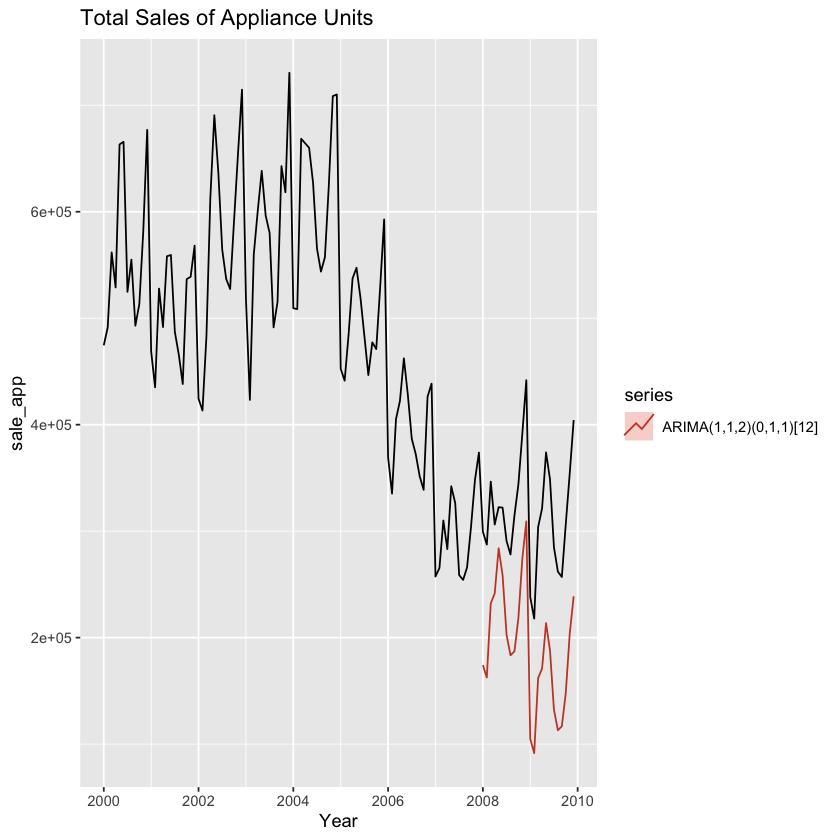

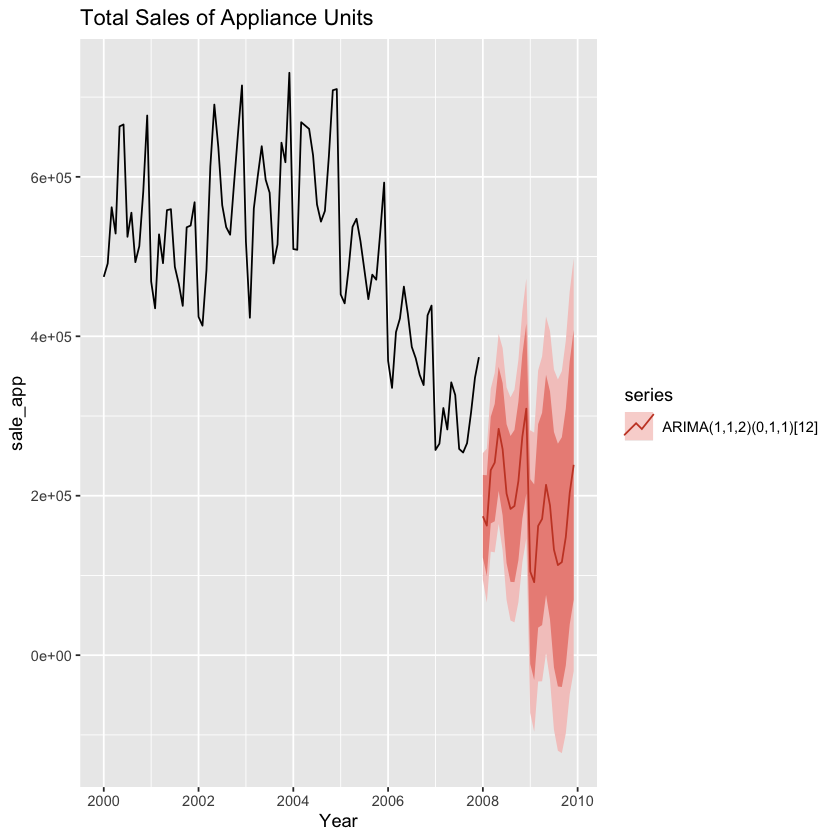

In [8]:
sale_bestf <- forecast(sale_best, h = 24)

autoplot(sale_data)+
    autolayer(sale_bestf, series="ARIMA(1,1,2)(0,1,1)[12]", PI = FALSE) +
    ggtitle("Total Sales of Appliance Units") + xlab("Year") +
    ylab("sale_app")
    
autoplot(sale_train)+
    autolayer(sale_bestf, series="ARIMA(1,1,2)(0,1,1)[12]") +
    ggtitle("Total Sales of Appliance Units") + xlab("Year") +
    ylab("sale_app")

**Analyze the plot in terms of the forecasting performance selected model (1).**

Best model yielded by the auto.arima() function is ARIMA(1,1,2)(0,1,1)[12]. Fitted model fails to capture the spikes of the test data. The forecasts follow the recent trend in the data. The point forecasts seem to trend downards. Also, the prediction intervals follow the pattern of the point forecasts. In comparison with ets() with model="ZZZ", it has slightly better forecasting than ARIMA. One reason could be the data has strong seasonality and captured the trend of the recent observations.

#### 3)

**Generate the accuracy measures of the selected model with respect to the testing dataset.**

In [9]:
accuracy(sale_bestf, sale_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-3135.422,36649.57,25721.18,-0.833697,5.340406,0.3334437,-0.03085237,NA
Test set,125294.094,129530.49,125294.09,40.379449,40.379449,1.6242851,0.83092110,2.534065


**Write a short analysis based on the accuracy measures.**

In this case, I will use MAPE for analysis. Training and test set of 5.340406% and 40.379449%, respectively. Selected model seems to fit well in the training set as it yielded relatively low percentage. However, the error increases in test set. Issues could be in stationarity or linearity of the time series data. Since the ets() function has been applied to sale_app data prior to this exercise, it showed a better MAPE score (21.273237%) in test set.

#### 4)

**Check the residuals of the selected model in (1). Has the selected model in (1) comply with the properties that residuals should have for full extraction of the patterns from the time series? Any recommendations?**

The ACF plot shows that spikes are now within the significance limits. Histogram of the residual shows a slightly normal distribution with right skewness and an outlier (around early 2000s of the data). The Ljung-Box test shows the test to be significant also. As it seems, the model passes the required checks. However, sometimes, models chosen manually can be better than auto.arima(). With overall performance, ets() model is more appropriate for sale_app data with clear trend and seasonality patterns. As for ARIMA, models are more flexible and can handle broader range of time series complexities.


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(0,1,1)[12]
Q* = 12.949, df = 15, p-value = 0.6062

Model df: 4.   Total lags used: 19




	Anderson-Darling normality test

data:  residuals(sale_best)
A = 1.2979, p-value = 0.002147


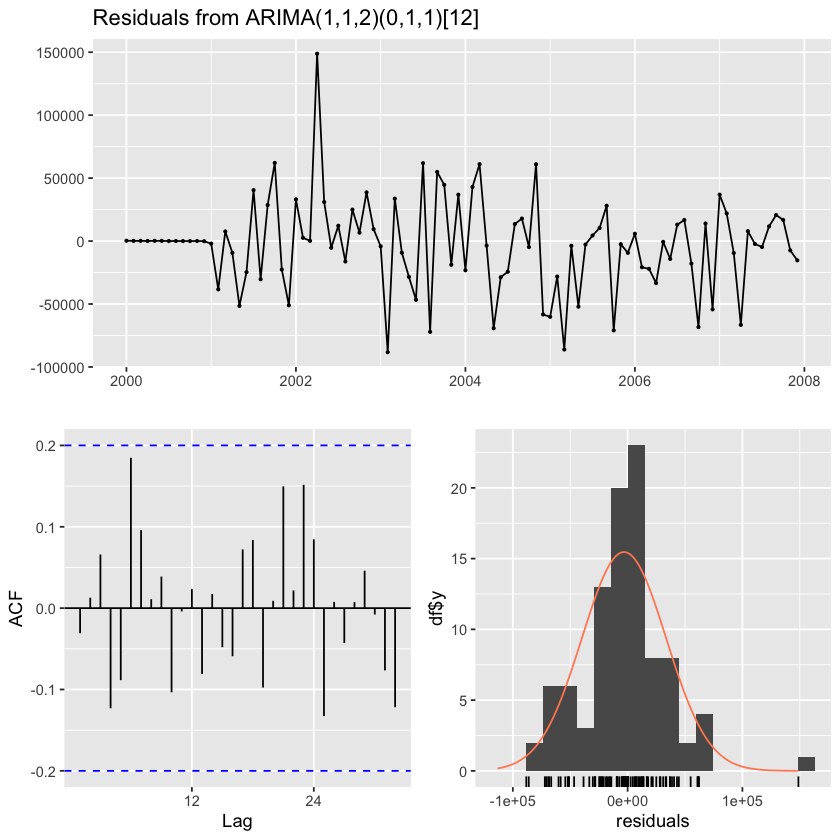

In [29]:
checkresiduals(sale_best)
nortest::ad.test(residuals(sale_best))

### Part 2, volpal data

### Data

In [13]:
Philquarter <- read.csv("/Users/ckabandala/Desktop/FILES/PMDSA/PMDSA Files/Forecasting Analytics/Datasets/PhilQuarterData.csv", header = TRUE)

volpal <- ts(na.omit(Philquarter$volpal), start = c(1994, 1), end = c(2008, 4), frequency = 4)

#### Train & Test dataset

In [14]:
volpal_train <- window(volpal, end = c(2005, 4)) # Q1 1994 - Q4 2005
volpal_test <- window(volpal, start = c(2006, 1)) # Q1 2006 - Q4 2008

#### 1)

**Show the best performing model based on the AICc of the training dataset**

In [17]:
volpal_best <- auto.arima(volpal_train)
summary(volpal_best)

# Best model is ARIMA(1,0,0)(0,1,1)[4] with drift

Series: volpal_train 
ARIMA(1,0,0)(0,1,1)[4] with drift 

Coefficients:
         ar1     sma1      drift
      0.3044  -0.5805  25158.209
s.e.  0.1433   0.1809   8825.585

sigma^2 = 1.231e+11:  log likelihood = -623.54
AIC=1255.09   AICc=1256.11   BIC=1262.22

Training set error measures:
                    ME   RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set -8689.019 324266 233898.9 -2.433879 9.099651 0.7403385 0.006599537

**Show the state space system of equations form of the model with estimated parameter values**

![Alt text](<Screen Shot 2023-11-28 at 14.37.13.png>)

#### 2)

**Show a plot of the forecasted value of sale_app for the test data added into the plot of the full dataset.**

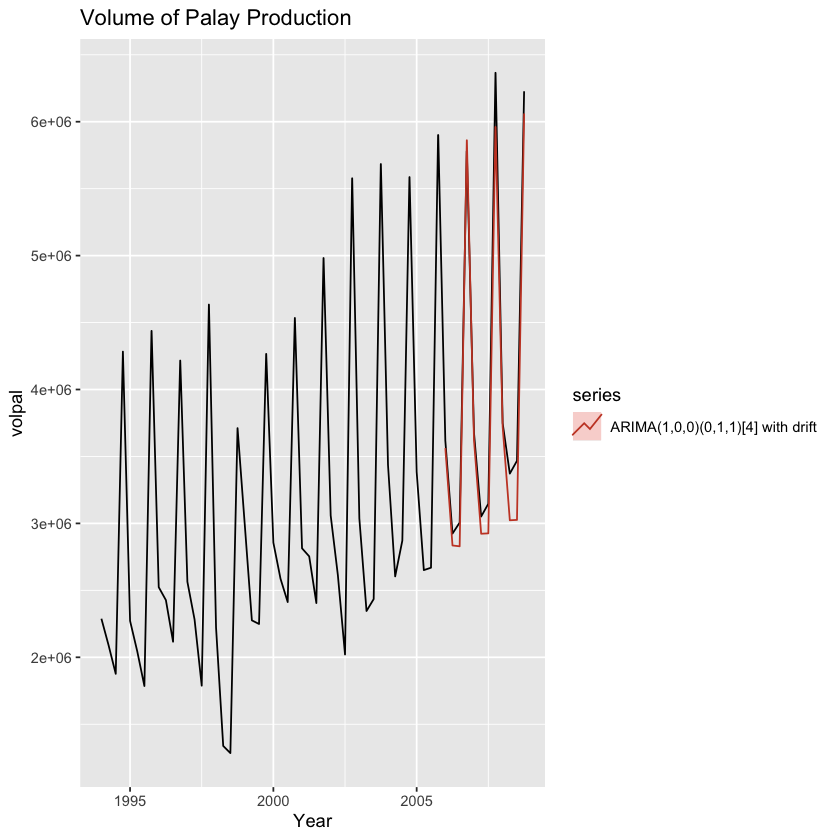

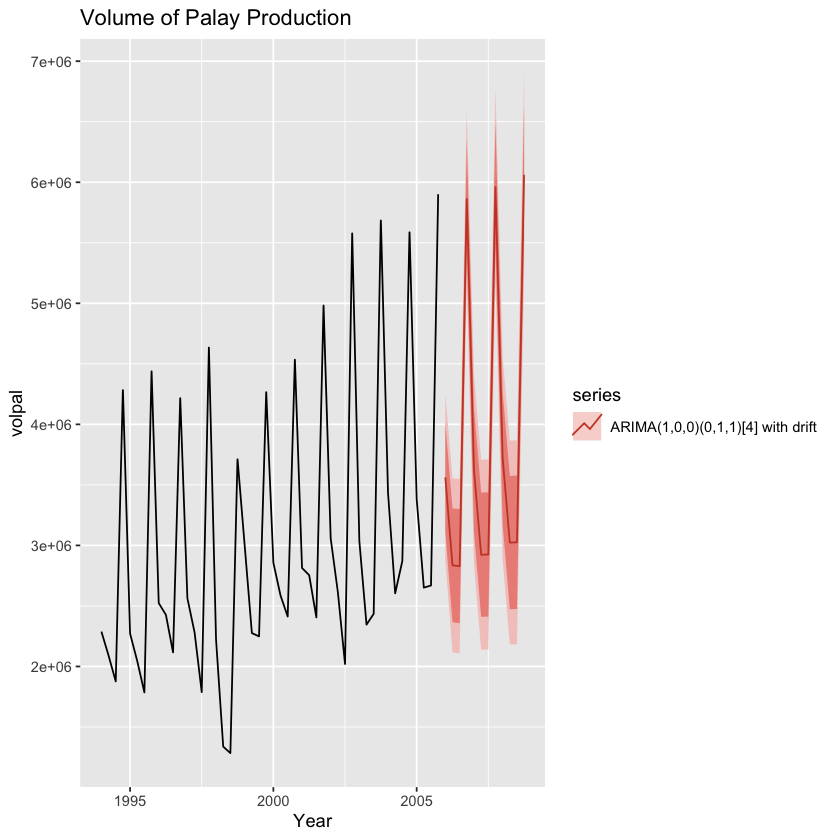

In [25]:
volpal_bestf <- forecast(volpal_best, h = 12)

autoplot(volpal)+
    autolayer(volpal_bestf, series="ARIMA(1,0,0)(0,1,1)[4] with drift", PI = FALSE) +
    ggtitle("Volume of Palay Production") + xlab("Year") +
    ylab("volpal")

autoplot(volpal_train)+
    autolayer(volpal_bestf, series="ARIMA(1,0,0)(0,1,1)[4] with drift") +
    ggtitle("Volume of Palay Production") + xlab("Year") +
    ylab("volpal")

**Analyze the plot in terms of the forecasting performance selected model (1).**

Time series data exhibits strong seasonality and almost persistent trend over time (trend could continue into the future). Best model given by the auto.arima() function is ARIMA(1,0,0)(0,1,1)[4] with drift. With clear trending going upwards, it is appropriate that is included in the model. The point forecast captures well the pattern of the test data with some missing spikes. When drift is added to the ARIMA model, it introduces a constant term (25158.209). It accounts the consistent trend going upwards.

#### 3)

**Generate the accuracy measures of the selected model with respect to the testing dataset.**

In [22]:
accuracy(volpal_bestf, volpal_test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-8689.019,324266.0,233898.9,-2.433879,9.099651,0.7403385,0.006599537,NA
Test set,169336.303,228234.9,182744.5,4.548933,4.780866,0.5784242,0.138727329,0.1388812


**Write a short analysis based on the accuracy measures.**

Training and test set of the model is 9.099651% and 4.780866%, respectively. The results for MAPE are somewhat expected because of how the forecasted data fitted well. Test data is lower than training data could imply different things such as overfitting in training data or not generalizing well to the unseen data. Otherwise, impressive ARIMA model for this data.

#### 4)

**Check the residuals of the selected model in (1). Has the selected model in (1) comply with the properties that residuals should have for full extraction of the patterns from the time series? Any recommendations?**

The ACF plot shows that spikes are also now within the significance limits. Histogram follows a normal distribution with outliers to both sides. Ljung-Box test shows the data to be significant also. For recommendations, maybe explore the data manually with Arima() function. In any case, seasonal ARIMA with drift is the best model so far.


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0)(0,1,1)[4] with drift
Q* = 2.2246, df = 6, p-value = 0.8979

Model df: 2.   Total lags used: 8




	Anderson-Darling normality test

data:  residuals(volpal_best)
A = 0.52442, p-value = 0.1728


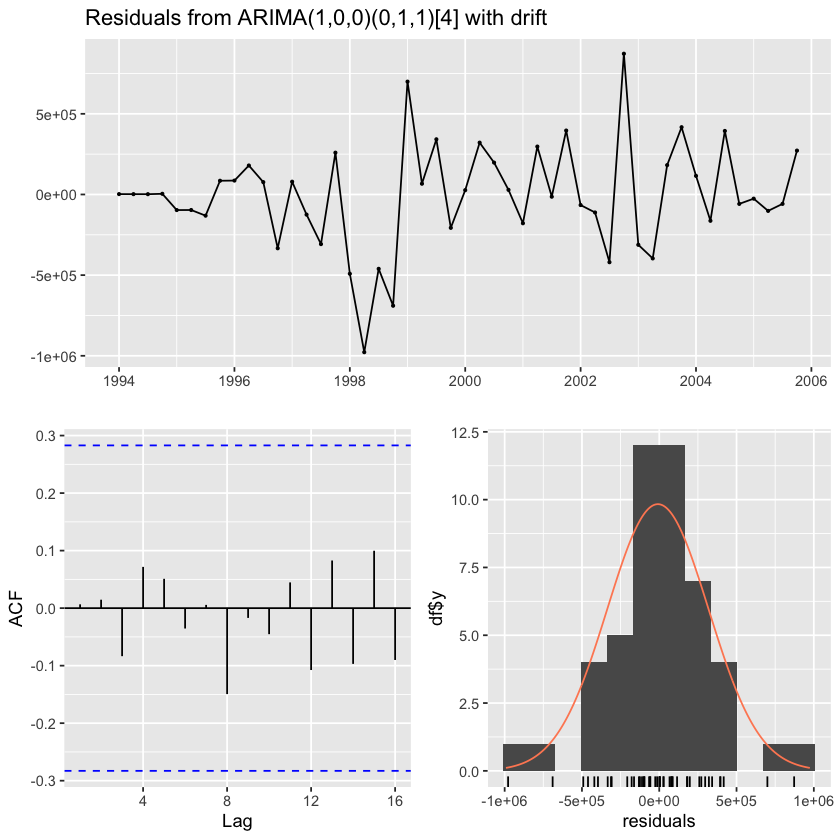

In [27]:
checkresiduals(volpal_best)
nortest::ad.test(residuals(volpal_best))